# Machine Learning

***

```sh
$ conda install tensorflow
```


https://keras.io/

crucial part of Machine Learning <br>
Install tensorflow as below <br>- keras is part of tensorflow since a while 

## Packages

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

In [2]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Single Input

***

![Single Input Neuron](img/neuron-single-input.svg)

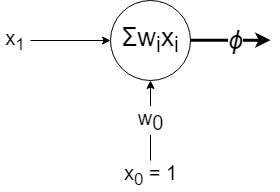

$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$

In [3]:
# Identity activation function.
def identity(x):
    return x

In [4]:
# Firing a neuron.
def fire_neuron(x, w):
       return w[1] * x +w[0]

    takes value x as input
    above x =1
    pass in w as a list [w0,w1]
    [0] = 1st element in list. [1] next element etc
    i.e[2,0]; w[0]=2, w[1]=0
    hence (0*1)+2= 2

In [5]:
fire_neuron(1, [2, 0])

2

In [6]:
#this is all neurons do
# i.e. w0 is index 0= 2 therefore whatever factor wx is we will  add 2
# w1 is index 1.  In the array below thats 3.
# x is defined as 1 below.
# Thus from def fire neuron above:
#  = 1*3[W1] +2[W0]= 5
fire_neuron(1, [2, 3])

5

In [8]:
fire_neuron(4, [2, 3])

14

In [9]:
fire_neuron(5, [5, 5])

30

In [10]:
# starting listing x as a series of values
# treat x as a list

In [11]:
# if x and w are numpy arrays
# np.sum(x *w ) will work i.e. it will iterate through the list of x and w
# 1st value of x has to be 1.0 at index 0
# x= np.array(1.0,4.0])
# w= np.array(2.0,3.0])
# x,w

In [12]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [13]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [14]:
# for array above thats sum((X0*W0)+(X1*W1)...)
# or sum((1.0*2.0)+(4.0*3.0))
fire_neuron(x, w, identity)

14.0

In [15]:
# Firing a neuron.
# will multiply 1st value of x with first value of w etc
# 1st value of x has to always be 1 (xo) as depicted in the diagram
def fire_neuron(x, w):
    return(np.sum(x * w))

In [16]:
# to get phi wrap it into the function
# wrap output in phi
# can pass as function in as an argument to another function

In [17]:
# Identity activation function.
def identity(x):
    return x

In [18]:
# Identity activation function.  Could be e.g. square the value
#def identity(x):
    #return x**2

In [19]:
# hence can pass 'phi' as function in as an argument to another function

In [20]:
# Firing a neuron. with inputs passed in as x, w  and phi(identity function)
# inputs x, with weights of values w, and activation function
# need to supply a list of x values, weights and activation function
# our x values will be supplied as a dataset
# we want to be able to change the w's in some sort of systematic way
# so that eventually its trained to give us the representation of x and w values
# weights start mimicking the underlying relationship
# training of the function
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [21]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [22]:
fire_neuron(x, w, identity)

14.0

## Data

***

In [23]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [24]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 4.22196979,  7.58310116, 11.37646127, 14.47619578, 20.47694036,
       22.14674905, 27.19004318, 31.86321348, 35.70107803, 40.5817147 ,
       45.08668497, 49.46349318])

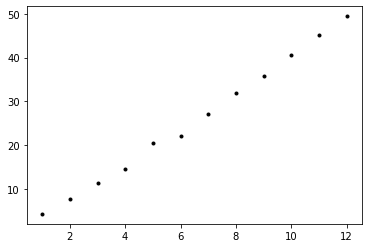

In [25]:
plt.plot(data_in, data_out, 'k.');

## Training

***

In [26]:
# An index in the data set.
i = 5

In [27]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 22.146749049148294)

In [28]:
# Initial weights.
w =  np.array([0.0, 1.0])

#def fire_neuron(x, w, phi):
 #   return phi(np.sum(x * w))

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

# fire_neuron(np.array([1.0,6.0]),[0.0,1.0],identity)
# for array above thats sum((X0*W0)+(X1*W1)...)
# or sum((1.0*0)+(6.0*1.0))
# = 6.0
# thus a weight of 'w' of 1.0 from [0.0, 1.0)] simply outputs the input
# but we know w should be closer to 4 based on the created data_in and data_out datasets
# to give a value of closer to 24

6.0

In [29]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

***

In [30]:
# Usually use sum of squares.
# x is input, y is the real-world output from an x,y dataset
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2
# i.e. return the difference between actual and predicted (squared) as 'cost'

In [31]:
# An index in the data set.
i = 5

In [32]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])
# predicted is ~6. actual is ~24. Diff is ~18 Squared is ~260

260.71750485617133

In [33]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

3.434539086832752

## Training

***

In [34]:
# Hyperparameter.
# setting a small marginal rate to increase/decrease w
learning_rate = 0.001

In [35]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w
# ultimately add or subtract the learning rate to w [array].
# does it increase/decrease the cost (def cost)
# note def fire_neuron is run inside def cost
# output of cost is passed into def train_neuron

In [36]:
# Set some initial weights.
w = np.array([0.0, 1.0])

In [37]:
# The training values.
data_in[i], data_out[i]

(6.0, 22.146749049148294)

In [38]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [39]:
# Nudge the weights towards better values.
# just one cycle of train neuron - to reduce the 'cost'
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved
#output is the w array or weight array.  
# thus a weight of 'w' of 1.0 from [0.0, 1.0)] simply outputs the input
# but we know w should be closer to 4 based on the created data_in and data_out datasets
# to give a value of closer to 24

array([0.   , 1.001])

In [40]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

In [41]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w. i.e. the w array
w

array([0.  , 3.97])

## Using keras

***

https://github.com/keras-team/keras

In [42]:
# run through the steps with a nonesense dataset

In [43]:
# Importing keras (already installed above) - ERROR IF INSTALLED MORE THAN ONCE IN THE KERNEL
# import tensorflow.keras as keras

In [44]:
# Create a new sequential neural network.
# sequentilal means designing by sequentially add neurons in layers
model = keras.Sequential()

In [45]:
# Add a dense layer with 64 neurons and use the relu activation function.
# copied from github.com/keras-team/keras
# add to model above
# use dense.layer 
# 64 neurons will be calculated before the 10 neurons in the 2nd later below
model.add(keras.layers.Dense(units=64, activation='relu'))

In [46]:
# Add a dense layer with 10 neurons and the softmax activation function.
# dense: every single of 10 neurons in 2nd layer will get an input from each of the 64 neurons in layer before it
# 640 conenctions each with their own weight 
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [47]:
# Compile the neural network.
# loss categorical crossentropy ?
# stacastic gradient descent - looks for local minimum
# loss is synonym for cost (cost function)
# keep an eye on metrics
# compile - make that into a nice package- i.e. build the graph in tensorflow
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [48]:
# Create a fake training data set.
# x and y are not related here
# needs 54 input data points
# output should be 10 data points
x_train = np.random.normal(0.0, 1.0, (100, 64))# 64 values coming in 100 times for the (input) X values
y_train = np.random.normal(0.5, 0.1, (100, 10))# 10 values coming out 100 times for the (output) Y values

In [49]:
# Train the neural network.
# we dont have x-train and y_train yet
# epoch = number of times the data passes through the graph
# batch size = take the data in batches of 32 and process them
# last batch might be  <32
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 1s 8ms/step - loss: 13.4771 - accuracy: 0.0700
Epoch 2/5
4/4 [==============================] - 0s 6ms/step - loss: 13.4438 - accuracy: 0.0700
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 13.4082 - accuracy: 0.0800
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 13.3838 - accuracy: 0.0800
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 13.3560 - accuracy: 0.0800


In [50]:
# Create a fake training data set.
# needs 64 input data points
# output should be 10 data points
# run just 10 this time
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [51]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 187ms/step - loss: 14.0863 - accuracy: 0.1000


In [52]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 206ms/step


In [53]:
classes

array([[0.17407236, 0.02666891, 0.04185056, 0.14354564, 0.26571476,
        0.00379184, 0.03161574, 0.12795064, 0.10989747, 0.07489212],
       [0.22599913, 0.04177343, 0.08345168, 0.01320642, 0.01780172,
        0.23242913, 0.1016464 , 0.04061123, 0.10695623, 0.13612464],
       [0.09331615, 0.13287044, 0.03473034, 0.03929155, 0.173545  ,
        0.03879993, 0.11576793, 0.09631252, 0.03887225, 0.23649397],
       [0.03552606, 0.06781932, 0.1829266 , 0.031144  , 0.13075465,
        0.00867326, 0.0310069 , 0.00905408, 0.46597993, 0.03711511],
       [0.02202224, 0.03285926, 0.09495441, 0.04075113, 0.35760775,
        0.08768465, 0.0252605 , 0.23456956, 0.03527958, 0.0690109 ],
       [0.03574976, 0.19465214, 0.04327027, 0.0181096 , 0.20628467,
        0.0230353 , 0.02594017, 0.11361216, 0.324835  , 0.01451098],
       [0.02490999, 0.04823268, 0.12232763, 0.0311198 , 0.22527671,
        0.02080214, 0.02829454, 0.24693047, 0.20263799, 0.04946813],
       [0.05873815, 0.08305518, 0.0477692

## Single Neuron in keras

***

In [54]:
#CREATE A NEW MODEL AGAIN- SINGLE LAYER- ONE NEURON- NO ACTIVATION FUNCTION
# Create a new sequential neural network.
model = keras.Sequential()

In [55]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [56]:
# Compile the neural network.
# loss function: keras loss functions - keras activation functions- google these
# provides loads of types of loss funvtions
# e.g. mean squared error function- computes the mean squared errors between labrls and predictions
# loss takes diff of true and predicted y values squared
# could square root but not needed
# other: categorical CrossEntropy
# jiggle the network to get closer to weight values that minimise the cost/loss
#single layer-single neuron- has a bias

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [57]:
# Real-world input values.
# copy and paste data in and data out from above
# change the parameter to get hundreds of values
# range 1-13 in iterations of 0.01
data_in = np.arange(1.0, 13.0, 0.01)

# change shape
# different between 1d array in numpy and keras
# keras wants to supply it each value as a 2d array- one element in each row
# errors like this happen all the time in Keras
# difficulty is hard to get NN to work at all
# 1/2 battle is to get it working at all
# don't give up
# even if fixed might get garbage out
# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [58]:
# Real-world output values.
# generate the y = mx +C
# hope the keras model has learned the relationship between x * y (multiply the input x 4)
# in NN will never be able to pull out all the weights from the model
# i.e. 640 different weights 64 individual bias
# in real will have so many weights that have tiny nudges to the answer
# not possible to unwind and understand relevance of each one
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

data_out

array([[ 5.13885617],
       [ 3.21091814],
       [ 3.40648041],
       ...,
       [52.5097734 ],
       [52.35131619],
       [52.79502185]])

In [59]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 2ms/step - loss: 20.7227 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0072 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 0.9930 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 2ms/step - loss: 0.9968 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 2ms/step - loss: 0.9828 - accuracy: 0.0000e+00


In [60]:
# Test input values.

# 1001 values
# reshape array
# run throigh the network
# values between -10 and + 20 (blue line in plot below)
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
# preds = predicted values
# model is the keras model
preds = model.predict(data_test)

32/32 [==============================] - 0s 1ms/step


In [61]:
# flatten back to 1d array
# could have included reshape in the function
data_test.flatten()[0]

-10.0

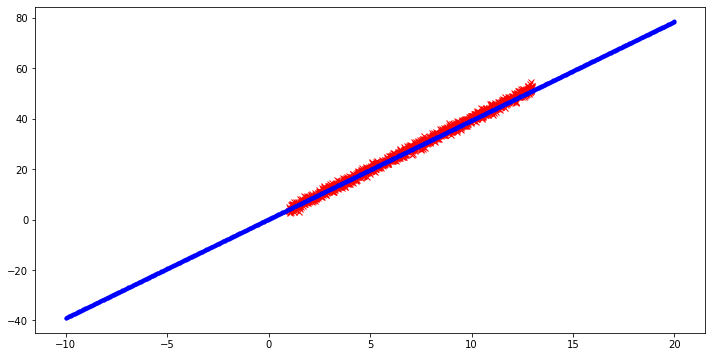

In [62]:
# Plot the values. (12*6 plot)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set. (red x )
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')
 
# Plot the predicted data set. (blue dots)
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

# single neuron NN has learned the relationship betwwen x and Y
# can now do predictions on that
# keras can do this easy -declare sequential NN
# use loss function using  mean-squared error
# dont tell the neuron how we get from X to Y

***

## End